In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
d1=pd.read_csv(r'C:\Users\mruna\Desktop\country_wise_latest.csv')

In [6]:
d1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [11]:
d1.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

<Axes: >

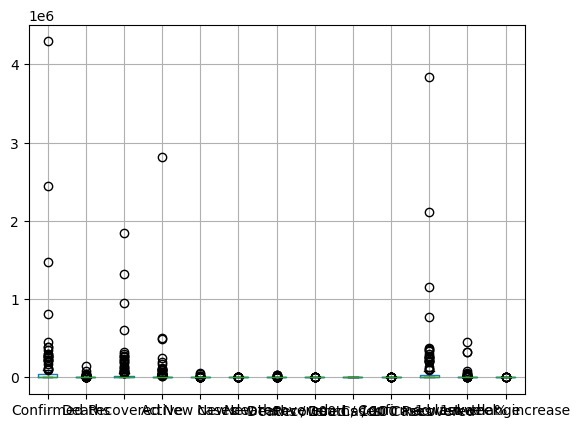

In [12]:
d1.boxplot()

In [13]:
from scipy.stats import zscore

In [29]:
def OT(data,col):
    z=abs(zscore(data[col]))
    Outlier=z>2
    data.loc[Outlier,col]=data[col].median()
    return data

In [30]:
for i in d1.select_dtypes(['int','float']):
    OT(d1,i)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [31]:
d1.boxplot()

<Axes: >

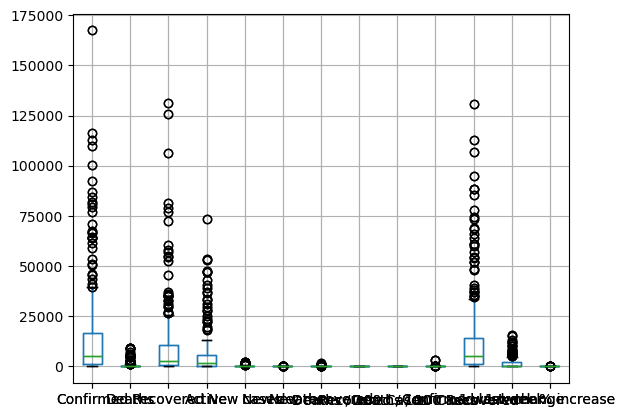

In [32]:
d1.boxplot()
plt.show()

In [36]:
Q1=d1['Confirmed'].quantile(0.25)
Q3=d1['Confirmed'].quantile(0.75)
IQR=Q3-Q1

In [37]:
UW=Q3+1.5*IQR
LW=Q1-1.5*IQR

In [39]:
upper_outlier=d1['Confirmed']>UW

In [41]:
d1.loc[upper_outlier,'Confirmed']=d1['Confirmed'].median()

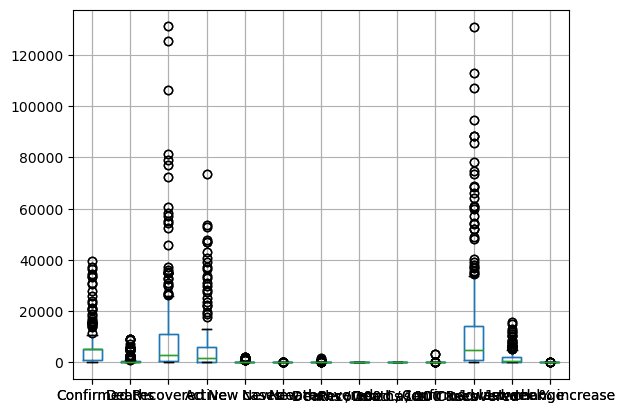

In [43]:
d1.boxplot()
plt.show()

In [44]:
def OT_IQR(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    UW=Q3+1.5*IQR
    LW=Q1-1.5*IQR
    upper_outlier=data[col]>UW
    lower_outlier=data[col]<LW
    data.loc[upper_outlier,col]=data[col].median()
    data.loc[lower_outlier,col]=data[col].median()
    return data

In [52]:
for i in d1.select_dtypes(['int','float']):
    OT_IQR(d1,i)

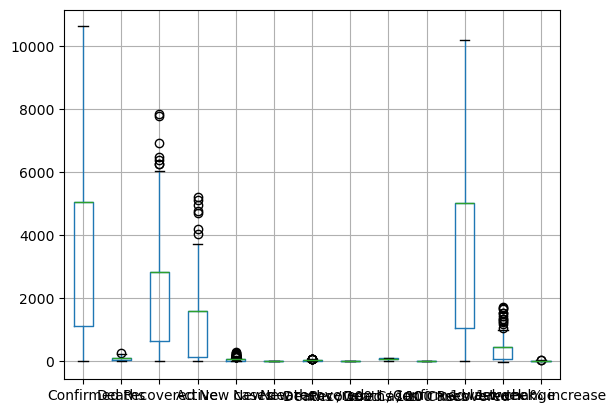

In [53]:
d1.boxplot()
plt.show()

In [50]:
d1.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

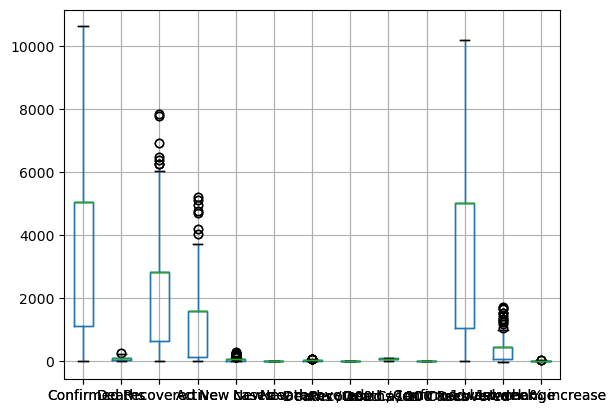

In [56]:
d1.boxplot()
plt.show()

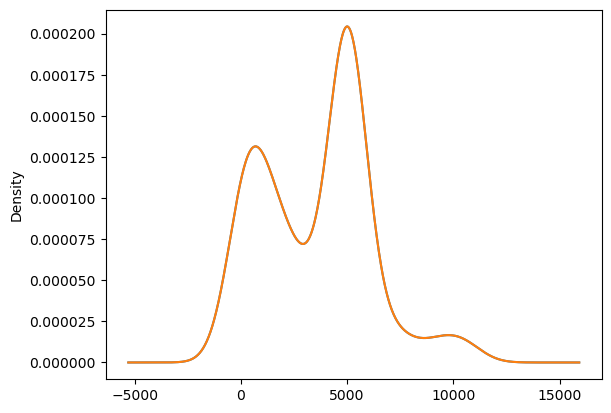

In [58]:
d1['Confirmed'].plot(kind='kde')
plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
MS=MinMaxScaler()

In [61]:
d1['Confirmed']=MS.fit_transform(d1[['Confirmed']])

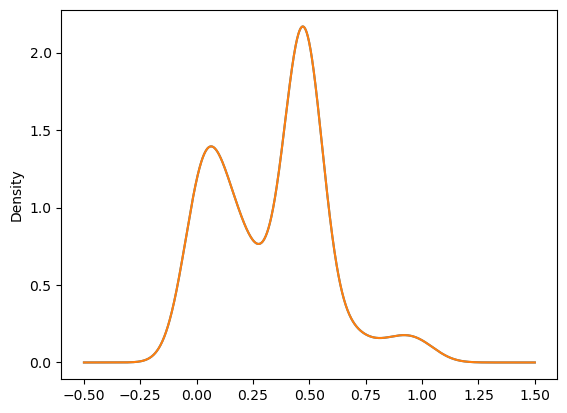

In [64]:
d1['Confirmed'].plot(kind='kde')
plt.show()

In [65]:
from sklearn.preprocessing import PowerTransformer

In [66]:
pt=PowerTransformer(method='yeo-johnson')

In [67]:
d1['pt_tb']=pt.fit_transform(d1[['Confirmed']])

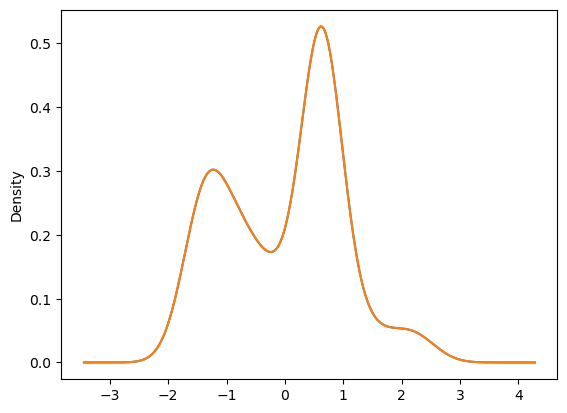

In [69]:
d1['pt_tb'].plot(kind='kde')
plt.show()

In [70]:
d1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,pt_tb
0,Afghanistan,0.475827,108,2815,1600,106,1,18,3.50,69.49,5.04,5020,737,2.07,Eastern Mediterranean,0.639141
1,Albania,0.458958,144,2745,1991,117,1,63,2.95,56.25,5.25,4171,709,17.00,Europe,0.574926
2,Algeria,0.475827,108,2815,1600,49,1,22,4.16,67.34,6.17,5020,432,18.07,Africa,0.639141
3,Andorra,0.084535,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,-1.067545
4,Angola,0.088587,41,242,667,18,1,0,4.32,25.47,3.62,749,201,6.89,Africa,-1.047057


In [76]:
top_10 = d1.nlargest(10, 'Active')

In [77]:
plt.figure(figsize=(8,5))  
sns.barplot(data=top_10, x='Country/Region', y='Active')

<Axes: xlabel='Country/Region', ylabel='Active'>

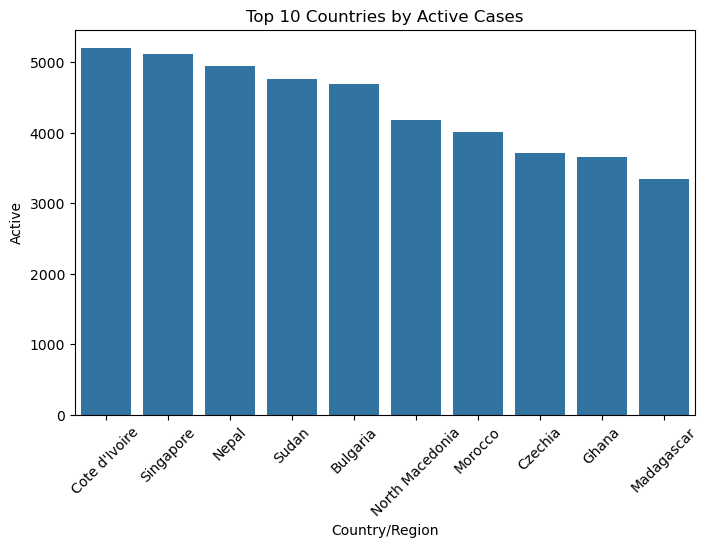

In [78]:
plt.xticks(rotation=45)  
plt.title("Top 10 Countries by Active Cases")  
plt.show()

In [79]:
top_10 = d1.nlargest(10, 'Deaths')

In [80]:
plt.figure(figsize=(8,5))  
sns.barplot(data=top_10, x='Country/Region', y='Deaths')

<Axes: xlabel='Country/Region', ylabel='Deaths'>

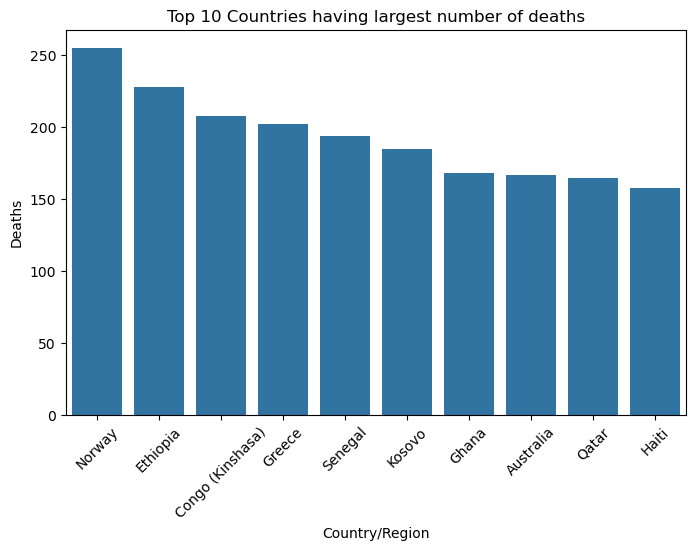

In [81]:
plt.xticks(rotation=45)  
plt.title("Top 10 Countries having largest number of deaths")  
plt.show()

In [82]:
top_10 = d1.nlargest(10, 'Recovered')

In [83]:
plt.figure(figsize=(8,5))  
sns.barplot(data=top_10, x='Country/Region', y='Recovered')

<Axes: xlabel='Country/Region', ylabel='Recovered'>

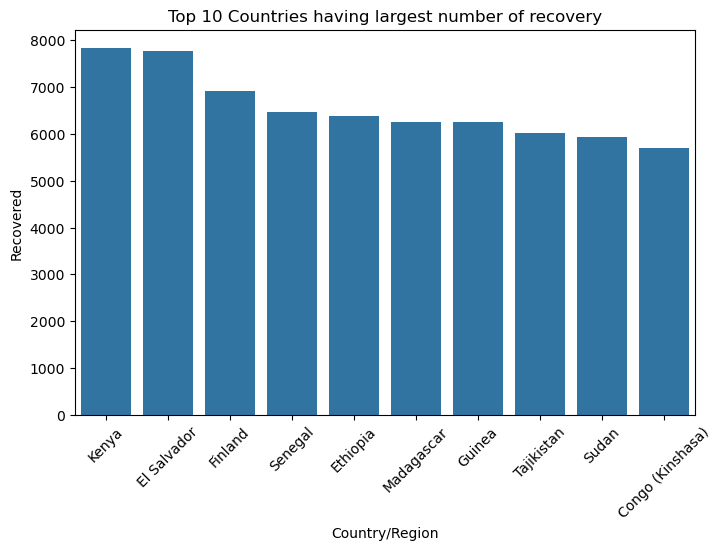

In [84]:
plt.xticks(rotation=45)  
plt.title("Top 10 Countries having largest number of recovery")  
plt.show()

In [110]:
d2=pd.read_csv(r'C:\Users\mruna\Desktop\Latest Covid-19 India Status.csv')

In [111]:
d2.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376


In [112]:
top_10 = d2.nlargest(10, 'Active')

In [113]:
plt.figure(figsize=(10,6))  
sns.barplot(data=top_10, x='State/UTs', y='Active')

<Axes: xlabel='State/UTs', ylabel='Active'>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

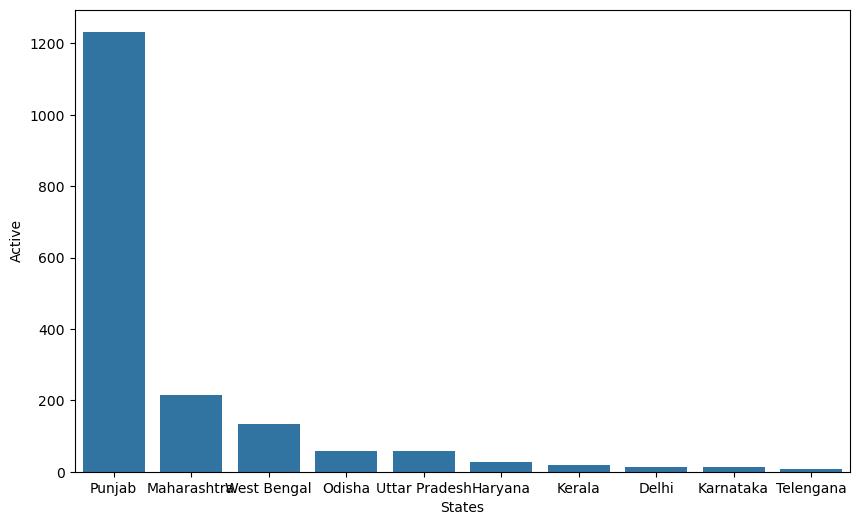

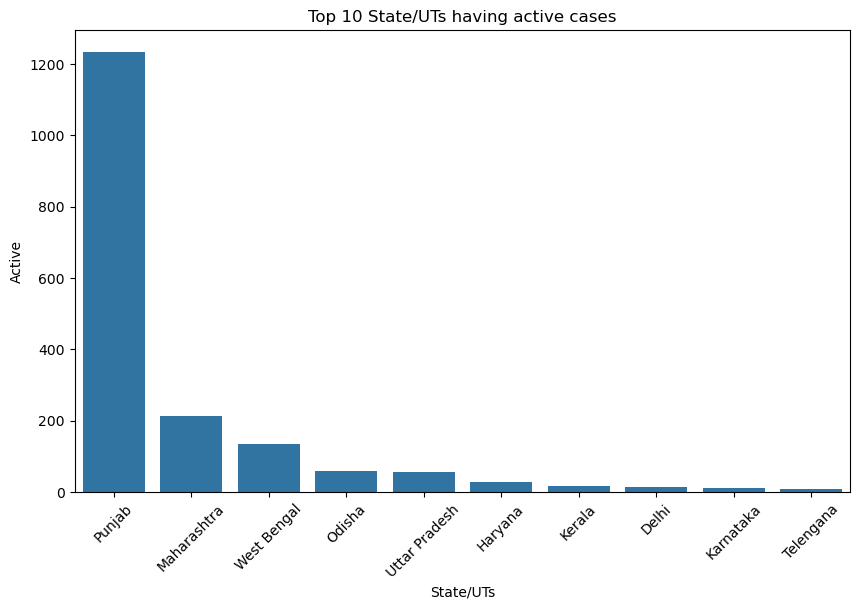

In [114]:
plt.xticks(rotation=45)  
plt.title("Top 10 State/UTs having active cases")  
plt.show()

In [115]:
top_10 = d2.nlargest(10, 'Total Cases')

In [116]:
plt.figure(figsize=(10,6))  
sns.barplot(data=top_10, x='State/UTs', y='Total Cases')

<Axes: xlabel='State/UTs', ylabel='Total Cases'>

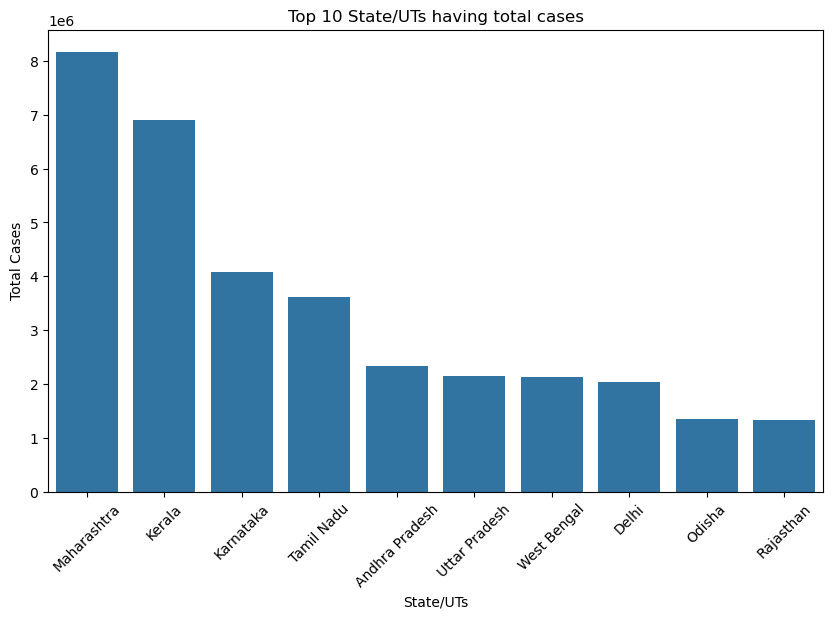

In [117]:
plt.xticks(rotation=45)  
plt.title("Top 10 State/UTs having total cases")  
plt.show()